## Phase 2.12

# Distributions

## Objectives
- Relate the concepts of distributions and normality back to data we are familiar with.
- Discuss outliers, ways to detect them and remove them.
- Discuss Z-scores and the ways we can calculate them.
- Discuss normality and how to asses it.

#### Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movies.csv', index_col=0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3466
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3467 non-null   int64  
 1   release_date       3467 non-null   object 
 2   movie              3467 non-null   object 
 3   production_budget  3467 non-null   float64
 4   domestic_gross     3467 non-null   float64
 5   worldwide_gross    3467 non-null   float64
 6   tconst             3467 non-null   object 
 7   primary_title      3467 non-null   object 
 8   original_title     3467 non-null   object 
 9   start_year         3467 non-null   int64  
 10  runtime_minutes    3056 non-null   float64
 11  genres             3467 non-null   object 
 12  revenue-domestic   3467 non-null   float64
 13  revenue-worldwide  3467 non-null   float64
 14  lost_money         3467 non-null   bool   
 15  roi-domestic       3467 non-null   float64
 16  roi-worldwide      3467 

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(3467, 18)

In [6]:
type(df['start_year'])

pandas.core.series.Series

In [7]:
df['start_year'].shape

(3467,)

# Visualizing Distributions

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

## Normal Distribution
> *AKA: Gaussian / Bell Curve*

<img src='images/standard-normal-distribution-with-probabilities.png'>


- Normal Distributions are symmetric around the mean.
- The mean, median, mode of a normal distribution are equal.
- The area under the bell curve is $1.0$.
- Normal distributions are dense in the center and less dense in the tails.
- Normal distributions are defined by two parameters: $\mu$ (mean) and $\sigma$ (standard deviation).
- Approximately $68\%$ of the area of a normal distribution is within one standard deviation of the mean.
    - $\pm1\sigma$
- Approximately $95\%$ of the area of a normal distribution is within two standard deviations of the mean.
    - $\pm2\sigma$

### Probability Mass Function (PMF)

- The **Probability Mass Function** associates *probabilities with **discrete** variables.*
    - *Discrete:* a number of known possible outcomes.

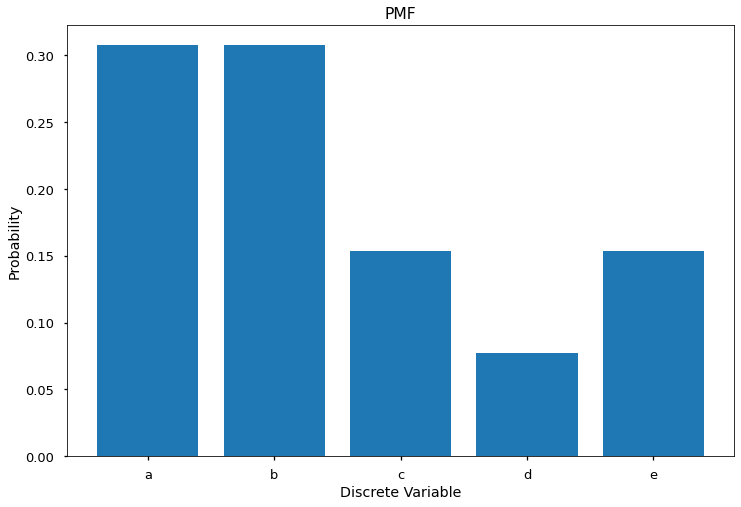

In [9]:
# PMF
a = (
    pd.Series(
        ['a','a','a','a',
         'b','b','b','b',
         'c','c',
         'd',
         'e','e']
    )
    .value_counts(normalize=True)
    .sort_index()
)

fig, ax = plt.subplots()
ax.bar(a.index, a)
ax.set(title='PMF', xlabel='Discrete Variable', ylabel='Probability')
fig.tight_layout()

### Probability Density Function (PDF)
- The **Probability Density Function** associates probabilities with **continuous** variables.
    - *Continuous:* A possibly-infinite number of outcomes.

<img src='images/pdf_demo.png'>

### Cumulative Distribution Function (CDF)
- The **Cumulative Distribution Function** shows $P(X \leq x)$ for an x within the sample space.

<img src='images/cdf.png'>

## Visualizing our Dataset

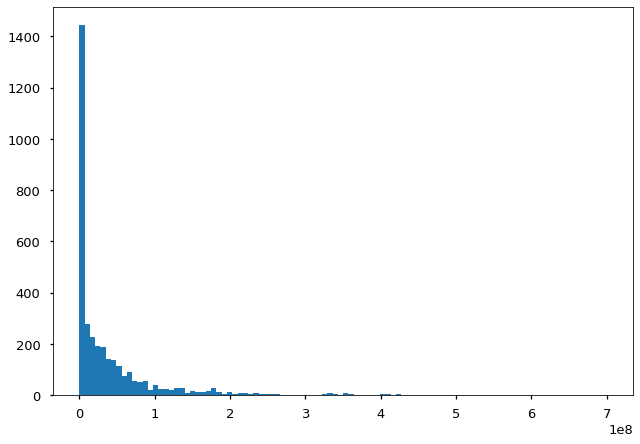

In [10]:
# Domestic Gross - Histogram
fig, ax = plt.subplots()
ax.hist(df['domestic_gross'], bins=100);

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


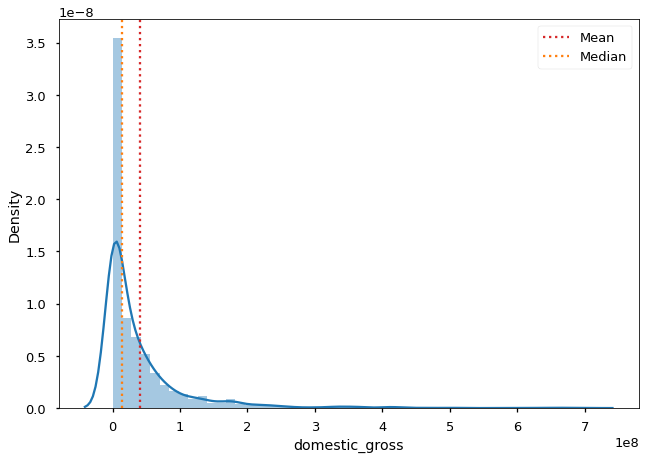

In [11]:
# Domestic Gross - KDE
fig, ax = plt.subplots()
sns.distplot(df['domestic_gross'], ax=ax)
ax.axvline(df['domestic_gross'].mean(), ls=':', color='tab:red', label='Mean')
ax.axvline(df['domestic_gross'].median(), ls=':', color='tab:orange', label='Median')
ax.legend()

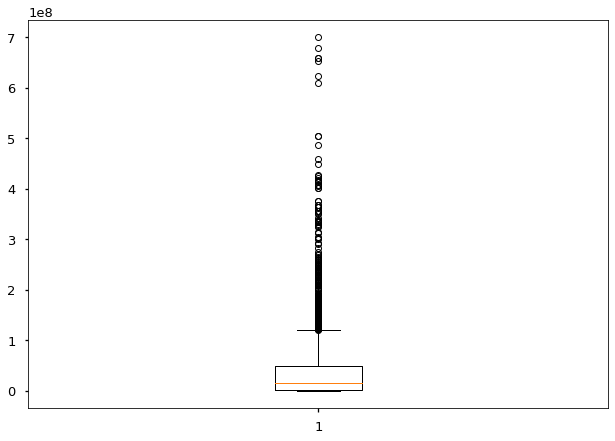

In [12]:
# Domestic Gross - Boxplot
fig, ax = plt.subplots()
ax.boxplot(df['domestic_gross']);

# Skew / Kurtosis

In [13]:
from scipy import stats

***Skew***
<img src='images/skew.png' width=75%>

In [14]:
# Domestic Gross - Skew
stats.skew(df['domestic_gross'])

3.735313634734876

***Kurtosis***
<img src='images/kurtosis.png'>
> *https://analystprep.com/cfa-level-1-exam/quantitative-methods/kurtosis-and-skewness-types-of-distributions/*

In [15]:
# Domestic Gross - Kurtosis
stats.kurtosis(df['domestic_gross'])

19.933980131434488

# Z-Score
- A *Z-Score* tells us how many standard deviations away from the mean a point would be in a *Standard Normal Distribution*.

$ \LARGE z = \frac{(x - \mu)}{\sigma} $
> - *$z$: z-score*
> - *$\mu$ (mu): population mean*
> - *$\sigma$ (sigma): population standard deviation*

---

- *Z-Scores* are associated with cumulative probabilities (retrieved from a *z-table*).
<img src='images/z-table.png' width=500>

> <a src='https://www.chegg.com/homework-help/questions-and-answers/usage-z-table-1-assuming-normal-distribution-using-z-tables-find-z-score-corresponding--75-q19507214'>*Chegg.com - Usage of Z-Table*</a>

### By Hand - Don't do this!

In [16]:
# Calculating z-score by hand.
## revenue-domestic
## Recall: z = (x - mean) / std
my_col = df[['runtime_minutes']].copy()
mean = my_col.mean()
std = my_col.std()
my_col

,runtime_minutes
0,136.0
1,113.0
2,141.0
3,149.0
4,120.0
...,...
3462,70.0
3463,93.0
3464,95.0
3465,77.0


In [17]:
z_score = (my_col - mean) / std
z_score.head()

,runtime_minutes
0,1.410466
1,0.572862
2,1.592554
3,1.883894
4,0.827785


In [18]:
# z_scores = []
# for v in my_col['runtime_minutes'].values:
#     z = (v - mean) / std
#     z_scores.append(z)
# z_scores[:5]

### Using `sklearn` and `StandardScaler`

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Instantiate the Object.
scaler = StandardScaler()
scaler

StandardScaler()

In [21]:
# Fit the object.
scaler.fit(my_col)

StandardScaler()

In [22]:
scaler.mean_

array([97.26963351])

In [23]:
scaler.var_

array([753.76499411])

In [24]:
# Transform column
scaler_transformed = scaler.transform(my_col)
scaler_transformed

array([[ 1.41069662],
       [ 0.57295546],
       [ 1.59281426],
       ...,
       [-0.08266806],
       [-0.73829158],
       [-0.77471511]])

In [25]:
# Revert column back to original values.
scaler.inverse_transform(scaler_transformed)

array([[136.],
       [113.],
       [141.],
       ...,
       [ 95.],
       [ 77.],
       [ 76.]])

In [26]:
# Shorthand
scaler = StandardScaler()
my_shorthand_col = scaler.fit_transform(my_col)
my_shorthand_col

array([[ 1.41069662],
       [ 0.57295546],
       [ 1.59281426],
       ...,
       [-0.08266806],
       [-0.73829158],
       [-0.77471511]])

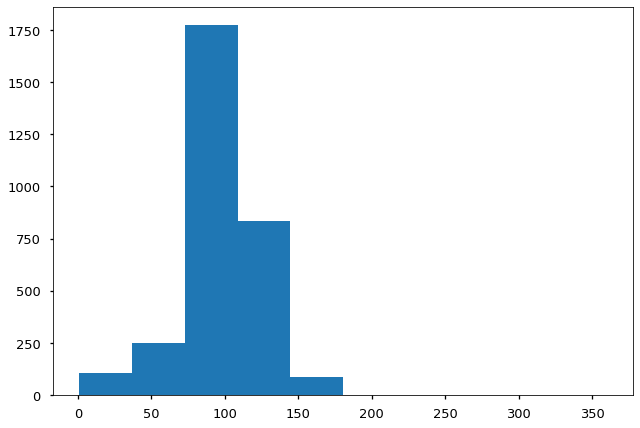

In [27]:
plt.hist(my_col);

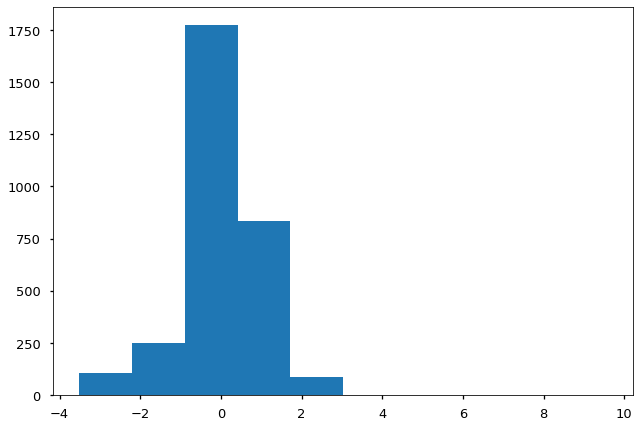

In [28]:
plt.hist(my_shorthand_col);

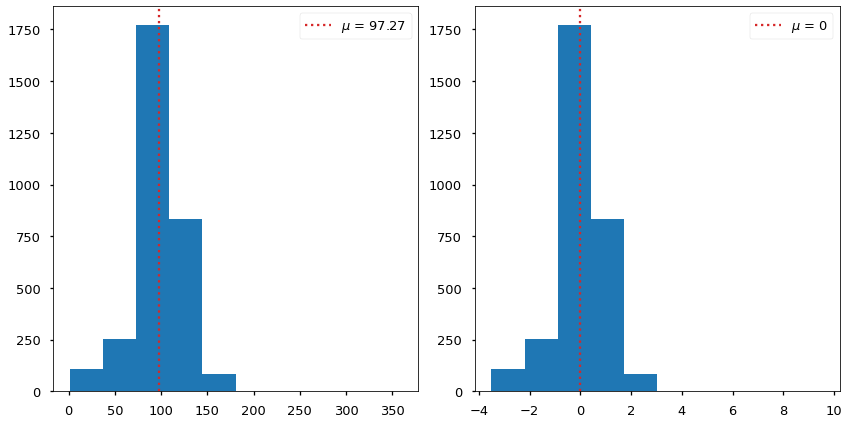

In [29]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
ax1.hist(my_col)
ax1.axvline(my_col['runtime_minutes'].mean(), 
            color='tab:red', 
            ls=':', 
            label=f"$\mu$ = {round(my_col['runtime_minutes'].mean(), 3)}")
ax1.legend()
ax2.hist(my_shorthand_col)
ax2.axvline(0, 
            color='tab:red', 
            ls=':',
            label='$\mu$ = 0')
ax2.legend()
fig.tight_layout()